### This Notebook Covers:
* Reading & Writing:
    - HTML
    - JSON
    - EXCEL
    - PICKLE

### Revision:
* reading and outputing to different formats:
    - pd.read_json(json_url), pd.read_html(html_url), pd.read_excel(xls_url), pd.read_csv(csv_url)
    - df.to_json(path_to_store), df.to_html(path_to_store), df.to_csv(path_to_store)
    - other formats: parquet, fixed-width-text file, HDF5, feather, ORC, msgpack, SPSS, stata, SAS, 
      pickle, sql, google big query
* Pickling:
    - pd.read_pickle(pkl_url), df.to_pickle('path_to_store')

In [4]:
import pandas as pd
import numpy as np

### Reading JSON

In [5]:
# JAVASCRIPT OBJECT NOTATION
# STANDARDIZED AND LANGUAGE INDEPENDENT

In [8]:
json_url = 'https://andybek.com/pandas-folks-json'

In [9]:
folks = pd.read_json(json_url)

In [10]:
folks

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


In [11]:
type(folks)

pandas.core.frame.DataFrame

In [12]:
folks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        4 non-null      object
 1   salary      4 non-null      int64 
 2   occupation  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


### Reading HTML

In [13]:
# STANDARD MARKUP LANGUAGE FOR WEB

In [15]:
# put together a datafram containing europian countries with it's population

In [18]:
data_url = 'https://en.wikipedia.org/wiki/List_of_European_countries_by_population'

In [31]:
countries = pd.read_html(data_url)

In [32]:
type(countries), len(countries)

(list, 2)

In [33]:
type(countries[0])

pandas.core.frame.DataFrame

In [35]:
countries[0].head()

,Unnamed: 0,Country / territory,UN estimate(2023),%change,Officialfigure,Officialdate,Unnamed: 6
0,1 .mw-parser-output .tooltip-dotted{border-bot...,Russia,144444359,−0.2%,146150789,1 Jan 2024[4],[a]
1,2 T,Turkey,85816199,0.1%,85372377,31 Dec 2023[5],NaN
2,3,Germany,83294633,−0.1%,84607016,30 Sep 2023[6],NaN
3,5 T,United Kingdom,67736802,0.3%,67596281,30 Jun 2022[7],[b]
4,4 T,France,64756584,0.2%,68410000,1 Apr 2024[8],[c]


In [38]:
countries = countries[0].loc[:,['Country / territory', 'Officialfigure']]

In [39]:
countries.rename({'Country / territory':'Country'}, axis=1, inplace=True)

In [40]:
countries.head()

,Country,Officialfigure
0,Russia,146150789
1,Turkey,85372377
2,Germany,84607016
3,United Kingdom,67596281
4,France,68410000


<AxesSubplot:xlabel='Country'>

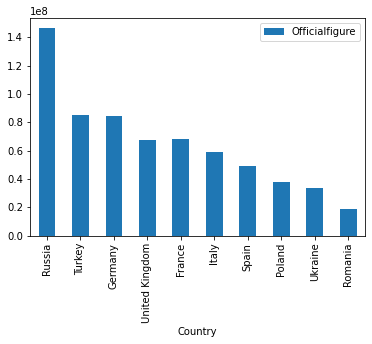

In [42]:
countries.set_index('Country').iloc[:10].plot(kind='bar')

### Reading EXCEL

* Popular formats:
    - .xls - binary format
    - .xlsx - xml based available in new versions

In [44]:
pd.read_excel('https://andybek.com/folks.xlsx')

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


In [45]:
pd.read_excel('https://andybek.com/folks.xlsx', sheet_name='hobbies')

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [46]:
pd.read_excel('https://andybek.com/folks.xlsx',1)

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [47]:
# Under the hood pandas uses many other packages/libraries. e.g. xlrd, openpyxl

In [ ]:
!pip show xlrd

In [ ]:
!pip show openpyxl

### Creating Output: to_* family of methods

In [50]:
hobbies = pd.read_excel('https://andybek.com/folks.xlsx', 1)

In [51]:
hobbies

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [52]:
# Tasks:
# - add a new person to the hobbies df
# - save resulting df to csv

In [53]:
hobbies.loc[4] = ['Zoltna Zachery', 'Archery']

In [56]:
hobbies['Age'] = np.random.uniform(22,40,5)

In [57]:
hobbies

,name,hobby,Age
0,Brian Dogood,Fishing,33.761164
1,Leah Bokeh,Skateboarding,30.029132
2,Mark Prescott,Value Investing,24.004577
3,Jurgen Gupta,Drawing,23.213315
4,Zoltna Zachery,Archery,36.224184


In [58]:
hobbies.to_csv()

',name,hobby,Age\r\n0,Brian Dogood,Fishing,33.761163883833326\r\n1,Leah Bokeh,Skateboarding,30.02913218187675\r\n2,Mark Prescott,Value Investing,24.004576845736405\r\n3,Jurgen Gupta,Drawing,23.21331475973713\r\n4,Zoltna Zachery,Archery,36.22418393348411\r\n'

In [68]:
hobbies.to_csv('hobbies.csv', index=False) # index=False to not save index in csv file.

In [ ]:
!dir

In [70]:
pd.read_csv('hobbies.csv')

,name,hobby,Age
0,Brian Dogood,Fishing,33.761164
1,Leah Bokeh,Skateboarding,30.029132
2,Mark Prescott,Value Investing,24.004577
3,Jurgen Gupta,Drawing,23.213315
4,Zoltna Zachery,Archery,36.224184


In [71]:
hobbies.to_json()

'{"name":{"0":"Brian Dogood","1":"Leah Bokeh","2":"Mark Prescott","3":"Jurgen Gupta","4":"Zoltna Zachery"},"hobby":{"0":"Fishing","1":"Skateboarding","2":"Value Investing","3":"Drawing","4":"Archery"},"Age":{"0":33.7611638838,"1":30.0291321819,"2":24.0045768457,"3":23.2133147597,"4":36.2241839335}}'

In [72]:
hobbies.to_json('hobbies.json')

In [ ]:
!dir

In [74]:
hobbies.to_html('hobbies.html')

In [ ]:
!dir

### Introduction to Pickling/serialization

In [90]:
# serialization: process of converting an object into a stream of bytes, 
# to be stored or transmitted over a network
# pickling: python std library module responsible for seria=lization
# also known as marshalling or flattening in other programming languages

In [80]:
import pickle

In [81]:
googl = {'ticker': 'GOOGL', 'shares': 10, 'book_cost': 1540.23}

In [82]:
pickle_output = open('my_stock', 'wb')

In [83]:
pickle.dump(googl, pickle_output)

In [84]:
pickle_output.close()

In [ ]:
!dir

In [86]:
pickle_input = open('my_stock', 'rb')

In [87]:
stock_dict = pickle.load(pickle_input)

In [88]:
stock_dict

{'ticker': 'GOOGL', 'shares': 10, 'book_cost': 1540.23}

In [89]:
!hexdump my_stock

'hexdump' is not recognized as an internal or external command,
operable program or batch file.


### Pickling in Pandas

In [91]:
p_url = 'https://andybek.com/portfolio'

In [93]:
folio = pd.read_pickle(p_url)
folio

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


In [94]:
folio.to_pickle('folio')

In [ ]:
!dir

In [96]:
pd.read_pickle('folio')

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


### The Many Other Formats

In [97]:
# parquet, fixed-width-text file, HDF5, feather, ORC, msgpack, 
# SPSS, stata, SAS, 
# pickle, sql, google big query

### Challenge

In [109]:
# 1. 'https://andybek.com/traders' - you will find page listing trader
# positioins and some attributes. Using pandas, read this table directly
# into a pandas df. Assign the df to variable positions.
positions = pd.read_html('https://andybek.com/traders')
positions=positions[0]
positions

,TraderID,Instrument,Amount,Trader Location
0,MCBIRN,02079K107,150000,EU
1,WISEA,1350Z74U5,6400000,EU
2,IACOP,GB00B3KJDQ49,2430000,US


In [110]:
# 2. 'https://andybek.com//pandas-traders-names' we have more info on traders.
# what is format of the data? read it into df as traders
# json
traders = pd.read_json('https://andybek.com/pandas-traders-names')
traders

,names,alias,seniority
0,Shylah McBirney,MCBIRN,Executive
1,Allen Wise,WISEA,Executive
2,Iacopo Brivio,IACOP,Junior
3,Allison Carter,CARTERA,Mid-level


In [117]:
# 3. combine 2 df from step 1 and 2 into a df that combines positions
# with the full name and senority of each trader
pd.merge(positions, traders, left_on='TraderID', right_on='alias').drop('alias',axis=1)

,TraderID,Instrument,Amount,Trader Location,names,seniority
0,MCBIRN,02079K107,150000,EU,Shylah McBirney,Executive
1,WISEA,1350Z74U5,6400000,EU,Allen Wise,Executive
2,IACOP,GB00B3KJDQ49,2430000,US,Iacopo Brivio,Junior


In [118]:
# 4. save the merged df from step 3 into pickle file called pickled_positions
# as well as csv file called positions.csv
# confirm that files have been saved locally.
merged_df = pd.merge(positions, traders, left_on='TraderID', right_on='alias').drop('alias',axis=1)


In [119]:
merged_df.to_pickle('pickled_positions')
merged_df.to_csv('positions.csv')

In [ ]:
!dir